# 🌸 Floranet

---
- 902011, Moleri Andrea, a.moleri@campus.unimib.it
- 865939, Armani Filippo, f.armani1@campus.unimib.it
---

## 🎯 Domain and Objectives

The notebook you are about to read contains a project called Floranet, which aims to classify, through the use of machine learning and deep learning techniques, a dataset containing 102 classes of different flowers. In particular, the dataset used is known as the [Oxford Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html), compiled by Maria-Elena Nilsback and Andrew Zisserman. Each of the 102 classes consists of a variable number ranging from 40 to 258 images per class. The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories. The dataset is visualized using isomap with shape and colour features. Our aim is therefore to investigate the possibilities of building models in order to solve the classification task. In other words, given an image of a flower, we want to be able to correctly identify and recognize the flower in question, minimizing the margin of error as much as possible.

In [13]:
import os
from scipy.io import loadmat
import pandas as pd

# Paths
images_dir = 'Data/images'
labels_path = 'Data/imagelabels.mat'

# Load labels
labels_data = loadmat(labels_path)
labels = labels_data['labels'][0]

# Get images and pair with labels
image_files = sorted([img for img in os.listdir(images_dir) if img.endswith('.jpg')])
data = {'image_name': image_files, 'label': labels[:len(image_files)]}

# Create DataFrame
df = pd.DataFrame(data)

Total number of images: 8189

Number of images per class (ordered by class):
Class 1: 40 images
Class 2: 60 images
Class 3: 40 images
Class 4: 56 images
Class 5: 65 images
Class 6: 45 images
Class 7: 40 images
Class 8: 85 images
Class 9: 46 images
Class 10: 45 images
Class 11: 87 images
Class 12: 87 images
Class 13: 49 images
Class 14: 48 images
Class 15: 49 images
Class 16: 41 images
Class 17: 85 images
Class 18: 82 images
Class 19: 49 images
Class 20: 56 images
Class 21: 40 images
Class 22: 59 images
Class 23: 91 images
Class 24: 42 images
Class 25: 41 images
Class 26: 41 images
Class 27: 40 images
Class 28: 66 images
Class 29: 78 images
Class 30: 85 images
Class 31: 52 images
Class 32: 45 images
Class 33: 46 images
Class 34: 40 images
Class 35: 43 images
Class 36: 75 images
Class 37: 108 images
Class 38: 56 images
Class 39: 41 images
Class 40: 67 images
Class 41: 127 images
Class 42: 59 images
Class 43: 130 images
Class 44: 93 images
Class 45: 40 images
Class 46: 196 images
Class 47

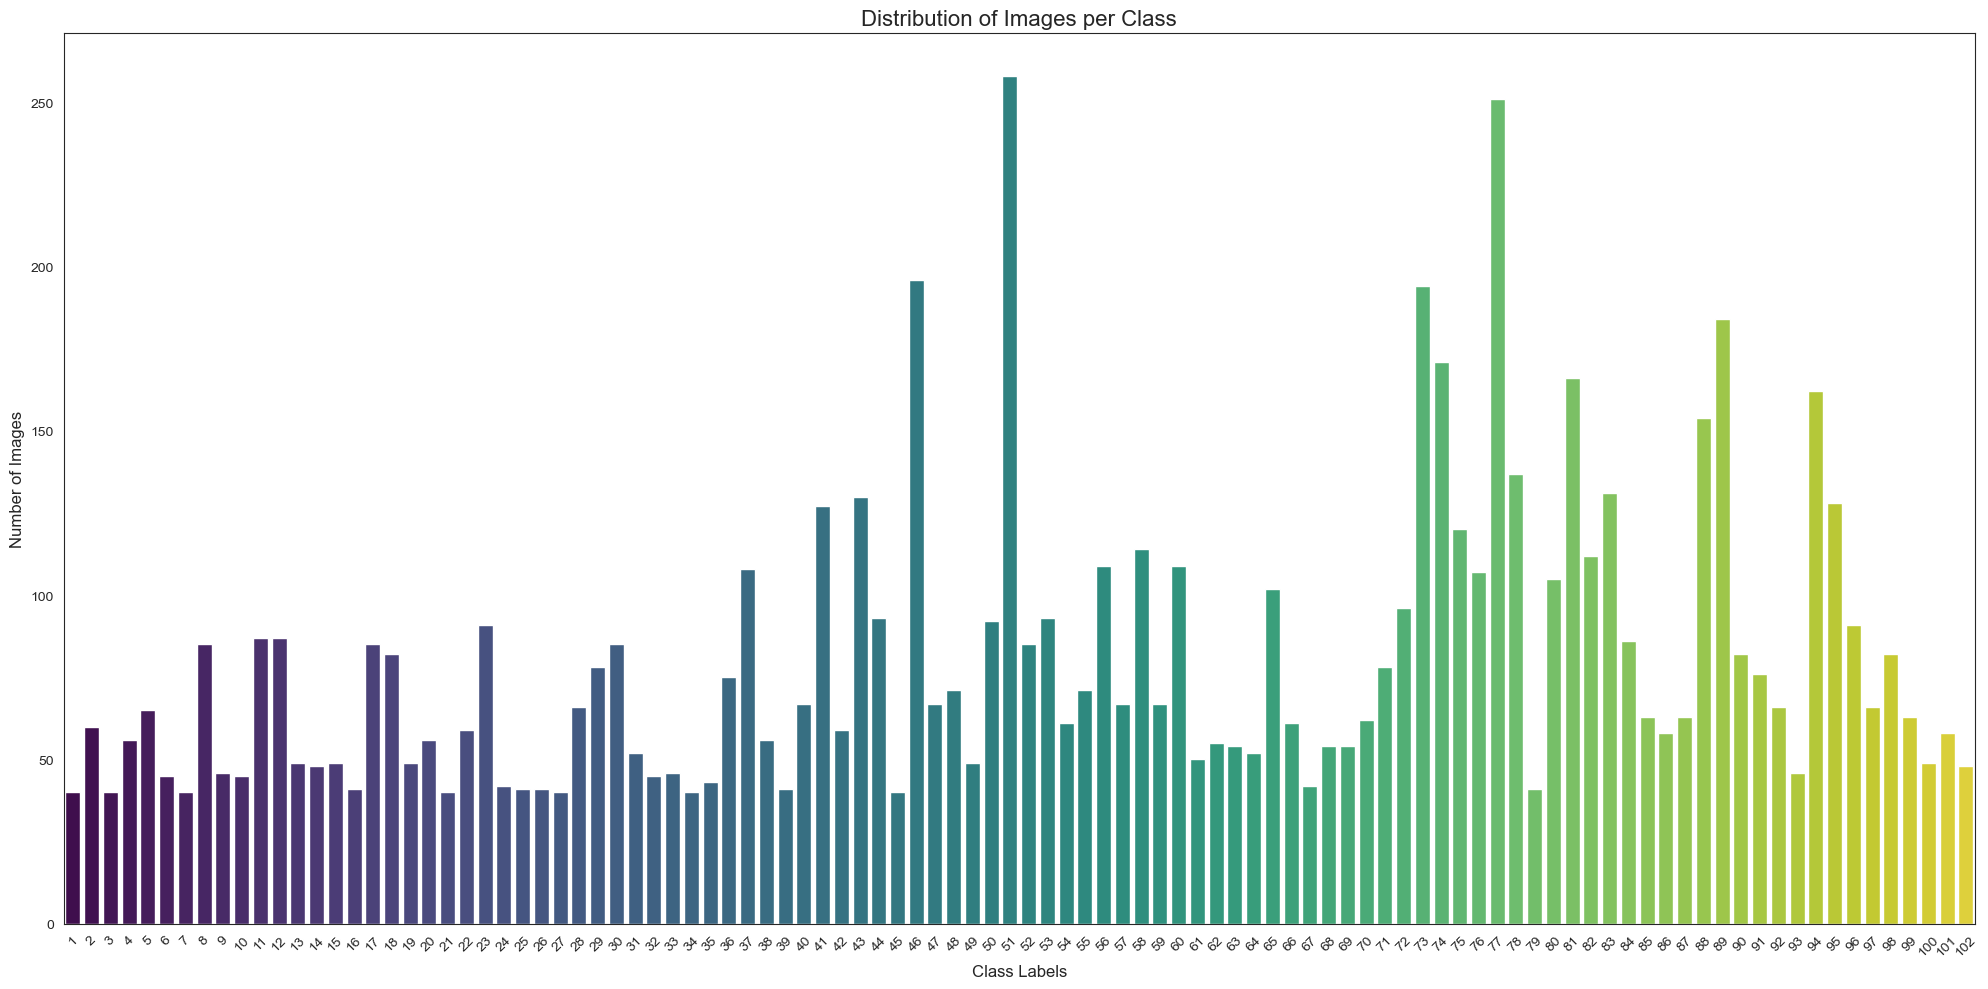

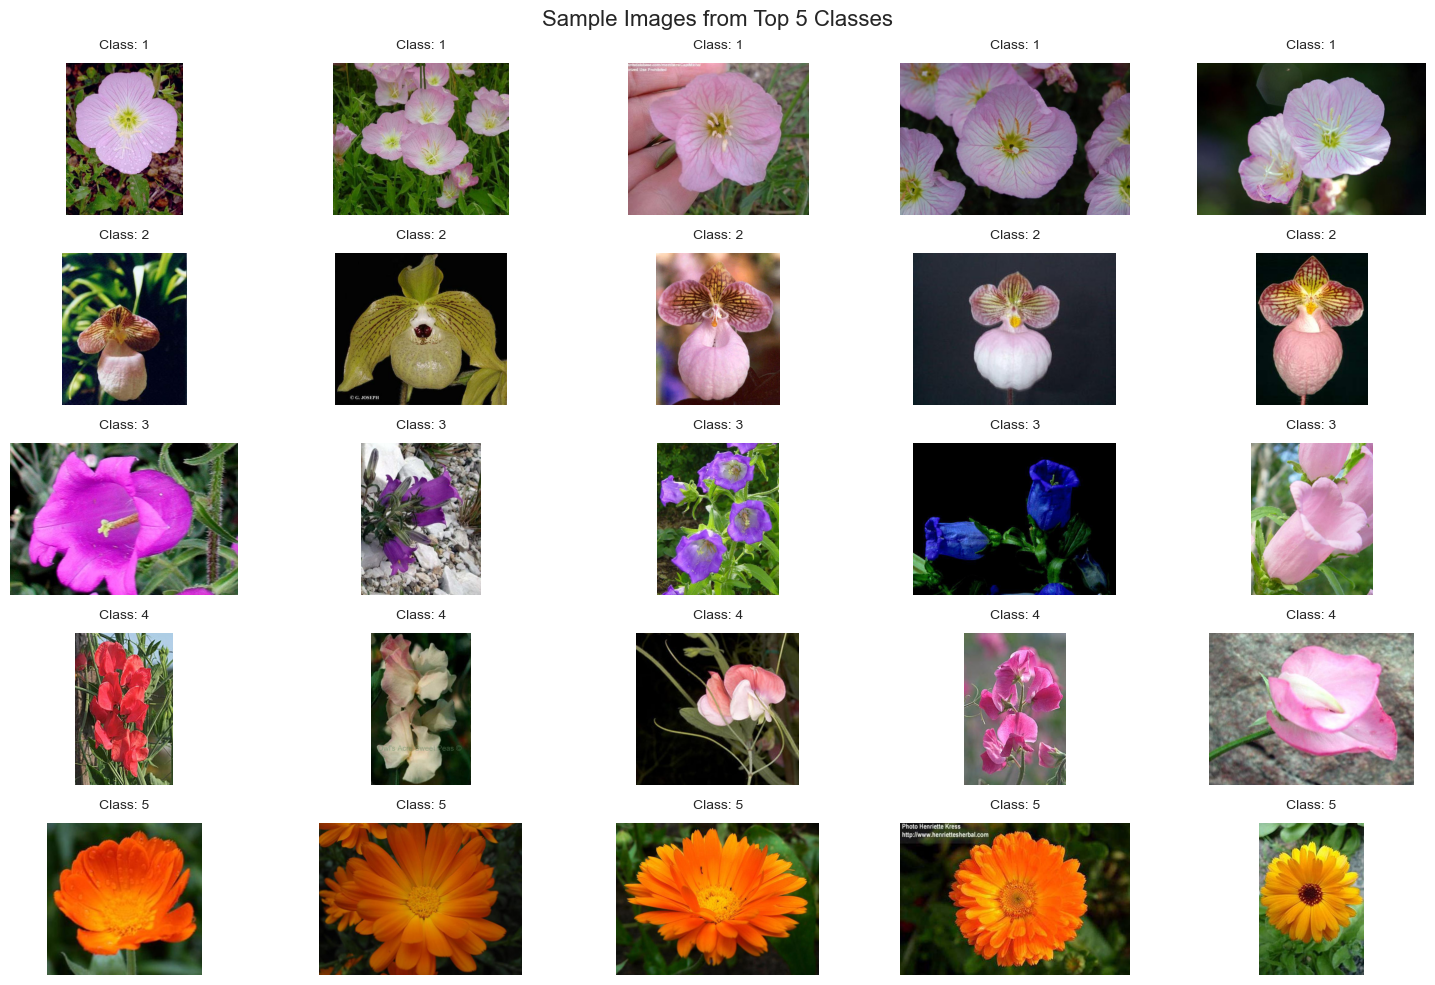

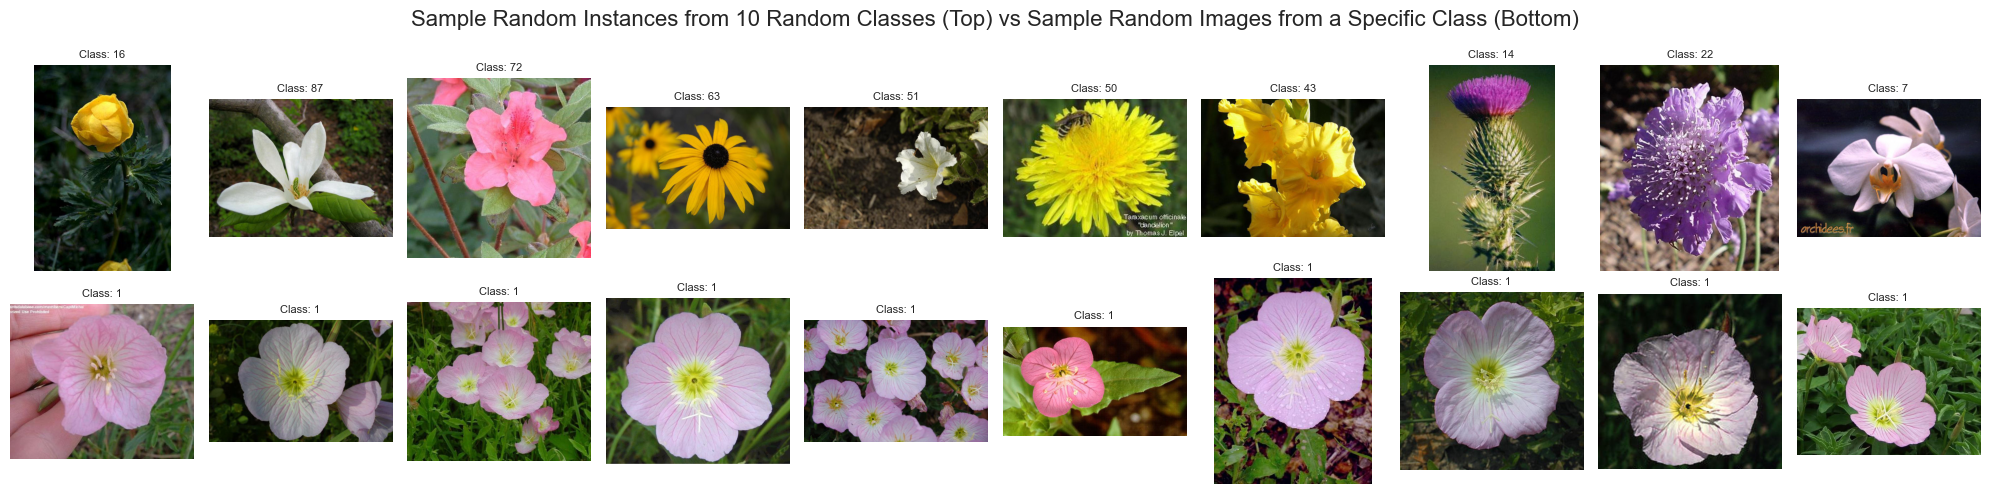

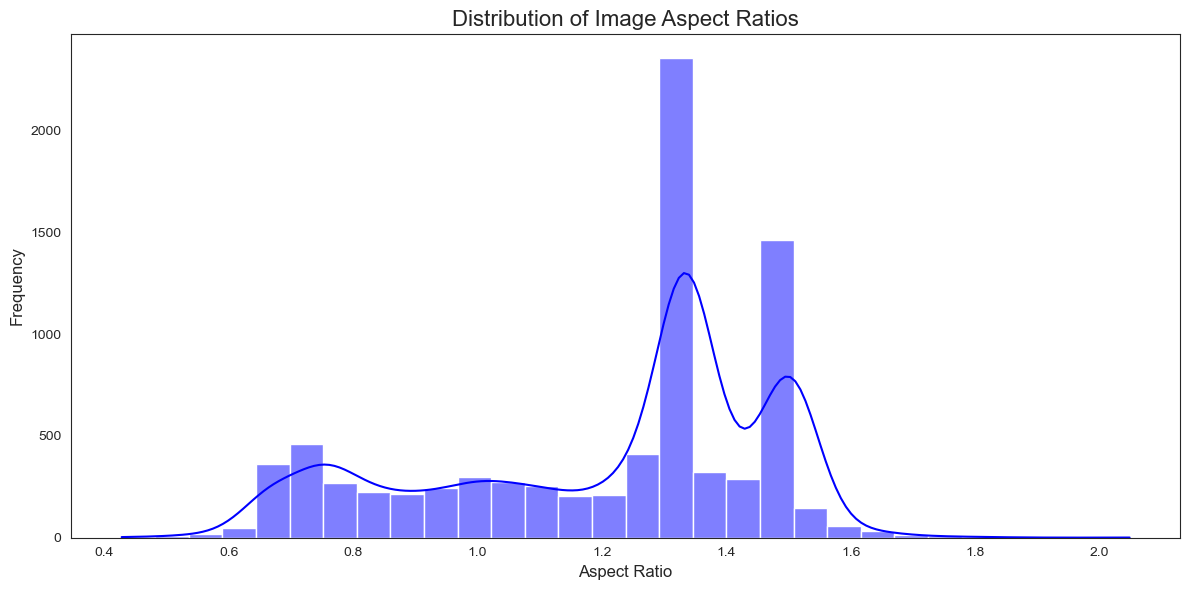


Image Dimension Statistics:
             Width       Height  Aspect Ratio
count  8189.000000  8189.000000   8189.000000
mean    630.160581   534.352058      1.210391
std      95.988254    75.453540      0.270855
min     500.000000   500.000000      0.428082
25%     501.000000   500.000000      1.000000
50%     667.000000   500.000000      1.332000
75%     699.000000   501.000000      1.398000
max    1024.000000  1168.000000      2.048000

Average number of images per class: 80.28


In [14]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Assuming df is the DataFrame and contains 'label' and 'image_name' columns
# Assuming labels contain all unique labels from the dataset

# 1. Number of total images
num_images = len(df)
print(f"Total number of images: {num_images}")

# 2. Number of images per class
images_per_class = df['label'].value_counts().sort_index()  # Sort by class labels
print("\nNumber of images per class (ordered by class):")
for label, count in images_per_class.items():
    print(f"Class {label}: {count} images")

# 3. Plotting distribution of images per class
plt.figure(figsize=(20, 10))  # Increased width and height of the figure
sns.set_style("white")  # Set plot background to white
sns.barplot(x=images_per_class.index, y=images_per_class.values, palette="viridis")
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Distribution of Images per Class', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Displaying sample images for the top 5 classes with most images
top_classes = images_per_class.head(5).index

fig, axes = plt.subplots(len(top_classes), 5, figsize=(15, 10))
for i, label in enumerate(top_classes):
    sample_images = df[df['label'] == label].sample(5)['image_name'].values
    for j, image_name in enumerate(sample_images):
        img_path = os.path.join(images_dir, image_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        # Adding the class label above each image
        axes[i, j].set_title(f"Class: {label}", fontsize=10, pad=10)
plt.suptitle('Sample Images from Top 5 Classes', fontsize=16)
plt.tight_layout()
plt.show()

# Combining 10 random images from random classes and class 1
random_classes = df['label'].drop_duplicates().sample(10).values
class_1_images = df[df['label'] == 1].sample(10)['image_name'].values

fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for i, label in enumerate(random_classes):
    image_name = df[df['label'] == label].sample(1)['image_name'].values[0]
    img_path = os.path.join(images_dir, image_name)
    img = Image.open(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Class: {label}", fontsize=8)

for i, image_name in enumerate(class_1_images):
    img_path = os.path.join(images_dir, image_name)
    img = Image.open(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title("Class: 1", fontsize=8)

plt.suptitle('Sample Random Instances from 10 Random Classes (Top) vs Sample Random Images from a Specific Class (Bottom)', fontsize=16)
plt.tight_layout()
plt.show()

# 5. Computing image dimensions and aspect ratio statistics
image_sizes = []
for image_name in df['image_name']:
    img_path = os.path.join(images_dir, image_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # (width, height)

# Converting to DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
sizes_df['Aspect Ratio'] = sizes_df['Width'] / sizes_df['Height']

# 6. Plotting distribution of aspect ratios
plt.figure(figsize=(12, 6))
sns.histplot(sizes_df['Aspect Ratio'], kde=True, color='blue', bins=30)
plt.xlabel('Aspect Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Image Aspect Ratios', fontsize=16)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nImage Dimension Statistics:")
print(sizes_df.describe())

# 7. Average number of images per class
avg_images_per_class = images_per_class.mean()
print(f"\nAverage number of images per class: {avg_images_per_class:.2f}")

In [15]:
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
seed = 42

# Splitting the dataset: 70% for training, 15% for validation, and 15% for testing
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=seed)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=seed)

# Get the number of images in each set
train_size = len(train_df)
valid_size = len(valid_df)
test_size = len(test_df)

# Total number of images
total_size = len(df)

# Class distribution in each set
train_class_dist = train_df['label'].value_counts().sort_index()
valid_class_dist = valid_df['label'].value_counts().sort_index()
test_class_dist = test_df['label'].value_counts().sort_index()

# Percentages of each set
train_percentage = (train_size / total_size) * 100
valid_percentage = (valid_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

# Output the results
print("🗂️ Data Split Summary\n" + "="*30)

# Total dataset size
print(f"Total number of images: {total_size} images\n")

# Size of each set
print(f"Training Set: {train_size} images ({train_percentage:.2f}%)")
print(f"Validation Set: {valid_size} images ({valid_percentage:.2f}%)")
print(f"Test Set: {test_size} images ({test_percentage:.2f}%)\n")

# Class distribution in each set
print("🧑‍🏫 Class Distribution:")
print("-"*30)

# Function to display class distributions clearly
def display_class_distribution(class_dist, set_name):
    print(f"\nClass distribution in the {set_name}:")
    print(f"{'Class':<10} {'Number of Images':<20} {'Percentage':<15}")
    print("-" * 50)
    for label, count in class_dist.items():
        percentage = (count / total_size) * 100
        print(f"{label:<10} {count:<20} {percentage:<15.2f}%")
    print("\n")

# Display class distributions for each set
display_class_distribution(train_class_dist, "Training Set")
display_class_distribution(valid_class_dist, "Validation Set")
display_class_distribution(test_class_dist, "Test Set")

# Optionally, save the sets to CSV files for further use
train_df.to_csv('Data/train_set.csv', index=False)
valid_df.to_csv('Data/valid_set.csv', index=False)
test_df.to_csv('Data/test_set.csv', index=False)

# Final summary with total number of classes
print("="*30)
print(f"Total number of classes: {df['label'].nunique()}")
print(f"Classes range from 0 to {df['label'].max()}")


🗂️ Data Split Summary
Total number of images: 8189 images

Training Set: 5732 images (70.00%)
Validation Set: 1228 images (15.00%)
Test Set: 1229 images (15.01%)

🧑‍🏫 Class Distribution:
------------------------------

Class distribution in the Training Set:
Class      Number of Images     Percentage     
--------------------------------------------------
1          28                   0.34           %
2          42                   0.51           %
3          28                   0.34           %
4          39                   0.48           %
5          46                   0.56           %
6          32                   0.39           %
7          28                   0.34           %
8          59                   0.72           %
9          32                   0.39           %
10         32                   0.39           %
11         61                   0.74           %
12         61                   0.74           %
13         34                   0.42           %
14   

In [17]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from tensorflow.keras.applications.efficientnet import preprocess_input

def debug_data(df, images_dir, labels, image_size=(224, 224)):
    # 1. Verifica che il numero di etichette corrisponda al numero di immagini
    assert len(labels) == len(df), "Il numero di etichette non corrisponde al numero di immagini!"

    # 2. Verifica che le etichette siano numeriche e che non ci siano valori fuori dal range
    unique_labels = np.unique(labels)
    print(f"Etichette uniche trovate nel dataset: {unique_labels}")

    # Troviamo etichette fuori dal range
    invalid_labels = unique_labels[(unique_labels < 0) | (unique_labels > 101)]
    if len(invalid_labels) > 0:
        print(f"Etichette fuori dal range: {invalid_labels}")
    else:
        print("Tutte le etichette sono nel range corretto.")

    # 3. Verifica che le immagini siano della stessa dimensione e ridimensionarle se necessario
    image_sizes = []
    for image_name in df['image_name']:
        img_path = os.path.join(images_dir, image_name)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)

    sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
    print(f"Dimensioni delle immagini:\n{sizes_df.describe()}")

    # Verifica se tutte le immagini hanno la stessa dimensione
    if not sizes_df['Width'].nunique() == 1 or not sizes_df['Height'].nunique() == 1:
        print("Attenzione: le immagini non hanno tutte le stesse dimensioni!")

    # 4. Ridimensionamento delle immagini (se necessario)
    print(f"Ridimensionamento delle immagini a {image_size}...")
    df['image_array'] = df['image_name'].apply(lambda x: preprocess_image(os.path.join(images_dir, x), image_size))

    # 5. Verifica che le immagini siano correttamente preprocessate (e.g., normalizzazione per EfficientNet)
    print("Verifica che le immagini siano state preprocessate correttamente (normalizzazione) per EfficientNet...")
    assert np.all(np.isfinite(df['image_array'].iloc[0])), "Le immagini non sono state preprocessate correttamente!"

    # 6. Verifica la distribuzione delle classi nel dataset di addestramento
    class_distribution = df['label'].value_counts()
    print(f"Distribuzione delle classi nel dataset:\n{class_distribution}")

    return sizes_df, class_distribution

# Debugging del dataset
debug_data(df, images_dir, labels)


Etichette uniche trovate nel dataset: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102]
Etichette fuori dal range: [102]
Dimensioni delle immagini:
             Width       Height
count  8189.000000  8189.000000
mean    630.160581   534.352058
std      95.988254    75.453540
min     500.000000   500.000000
25%     501.000000   500.000000
50%     667.000000   500.000000
75%     699.000000   501.000000
max    1024.000000  1168.000000
Attenzione: le immagini non hanno tutte le stesse dimensioni!
Ridimensionamento delle immagini a (224, 224)...
Verifica che le immagini siano state preprocessate correttamente (normalizzazione) per E

(      Width  Height
 0       591     500
 1       625     500
 2       500     667
 3       667     500
 4       508     500
 ...     ...     ...
 8184    713     500
 8185    609     500
 8186    554     500
 8187    702     500
 8188    667     500
 
 [8189 rows x 2 columns],
 label
 51    258
 77    251
 46    196
 73    194
 89    184
      ... 
 7      40
 45     40
 34     40
 1      40
 27     40
 Name: count, Length: 102, dtype: int64)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Parameters
image_size = (224, 224)  # Input size for EfficientNetB0
batch_size = 32
num_classes = df['label'].nunique()  # Total number of classes

# Prepare the datasets
def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, image_size)
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Create TensorFlow datasets
def create_tf_dataset(df, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((
        df['image_name'].apply(lambda x: os.path.join(images_dir, x)).values,
        df['label'].values - 1  # Convert to zero-based indexing
    ))
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(len(df))
    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

train_dataset = create_tf_dataset(train_df)
valid_dataset = create_tf_dataset(valid_df, shuffle=False)
test_dataset = create_tf_dataset(test_df, shuffle=False)

# Load EfficientNetB0 with pre-trained weights and modify it
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model initially

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True, monitor="val_accuracy", mode="max")

# Train the model
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=30,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze all layers except the last 20
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning
fine_tune_history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=20,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/30
180/180 [==============================] - ETA: 0s - loss: 4.5936 - accuracy: 0.0251

/Users/andreamoleri/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


180/180 [==============================] - 200s 1s/step - loss: 4.5936 - accuracy: 0.0251 - val_loss: 4.5880 - val_accuracy: 0.0236
Epoch 2/30
180/180 [==============================] - 192s 1s/step - loss: 4.5896 - accuracy: 0.0265 - val_loss: 4.5724 - val_accuracy: 0.0301
Epoch 3/30
180/180 [==============================] - 191s 1s/step - loss: 4.5963 - accuracy: 0.0269 - val_loss: 4.5871 - val_accuracy: 0.0236
Epoch 4/30
  2/180 [..............................] - ETA: 2:18 - loss: 4.5765 - accuracy: 0.0000e+00 

KeyboardInterrupt: 